In [38]:
# Gruppemedlemmer: Hanne Austad s375093 -- Maryam Alam s375091 -- Jaspreet Kaur s375164 -- Masooma Zahrah Azhar Khanum s374971
# Oppgave 1
# Importing necessary packages
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


In [2]:
# Reading Grocery CSV file and creating dataframe 
Grc_df = pd.read_csv('data/Grocery_dataset.csv')

In [3]:
# Number of rows (5000) and columns (12) in dataset
Grc_df.shape

(5000, 12)

In [4]:
# First 10 rows
Grc_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
# Last 10 rows
Grc_df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4990,FDE46,18.60,Low Fat,0.015859,Snack Foods,152.9366,OUT017,2007,NaN,Tier 2,Supermarket Type1,453.4098
4991,NCQ53,17.60,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
4992,NCN42,20.25,Low Fat,0.014281,Household,148.0418,OUT018,2009,Medium,Tier 3,Supermarket Type2,1177.1344
4993,DRH11,5.98,Low Fat,0.075675,Hard Drinks,53.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,331.5684
4994,NCI42,18.75,Low Fat,0.010382,Household,207.8954,OUT049,1999,Medium,Tier 1,Supermarket Type1,2292.3494
4995,FDT07,5.82,Regular,0.077476,Fruits and Vegetables,255.3330,OUT045,2002,NaN,Tier 2,Supermarket Type1,4870.3270
4996,DRL60,8.52,Low Fat,0.027059,Soft Drinks,153.3682,OUT046,1997,Small,Tier 1,Supermarket Type1,914.8092
4997,FDG20,15.50,Regular,0.126200,Fruits and Vegetables,178.4028,OUT018,2009,Medium,Tier 3,Supermarket Type2,1239.7196
4998,FDF56,16.70,Regular,0.119462,Fruits and Vegetables,182.7976,OUT046,1997,Small,Tier 1,Supermarket Type1,1810.9760
4999,FDV33,9.60,Regular,0.027455,Snack Foods,258.1304,OUT018,2009,Medium,Tier 3,Supermarket Type2,2324.9736


In [6]:
# Oppgave 2
# Checking for null values
Grc_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# We see 818 null values in Item_Weight and 1439 in Outlet_Size.
# To showcase both methods shown in the Labs, we will replace the Item_Weight null values with the mean, and drop the rows with Outlet_Size null values.

# Put Item_Weight into a separate variable, then find mean
item_weight = Grc_df['Item_Weight']
item_weight_mean = item_weight.mean()

# Create a Series where the Item Weight null values are replaced with the mean
item_weight_cleaned = item_weight.fillna(item_weight_mean)

# Put Outlet_Size into a separate variable, then create a Series where the Outlet Size rows with null values are dropped
outlet_size = Grc_df['Outlet_Size']
outlet_size_cleaned = outlet_size.dropna()

# Double check for null values after replacing/removing them
print(f'Null values in outlet_size_cleaned: {outlet_size_cleaned.isnull().sum()}')
print(f'Null values in outlet_size_cleaned: {outlet_size_cleaned.isnull().sum()}')

# To apply the changes to the actual dataset Grc_df and not just the Series; add the following commands
# Grc_df['Item_Weight'].fillna(item_weight_mean, inplace=True)
# Grc_df.dropna(subset=['Outlet_Size'], inplace=True) 
# Grc_df.isnull().sum()


Null values in outlet_size_cleaned: 0
Null values in outlet_size_cleaned: 0


In [8]:
#Oppgave 3
# Get unique outlet sizes from the dataset
unique_outlet_sizes = Grc_df['Outlet_Size'].unique()

# Count the number of unique outlet sizes including nan.(nan (Not a Number) represents missing or undefined values in the dataset)
num_unique_outlet_sizes = len(unique_outlet_sizes)

#Printing the number of unique outlet sizes and the unique sizes themselves
print(f"Number of Unique Outlet Sizes: {num_unique_outlet_sizes}")  # This includes'nan' in the count
print(f"Unique Outlet Sizes: {unique_outlet_sizes}")  # This lists all unique sizes, including 'nan'


Number of Unique Outlet Sizes: 4
Unique Outlet Sizes: ['Medium' nan 'High' 'Small']


In [9]:
# Get the count of each outlet size
outlet_size_counts = Grc_df['Outlet_Size'].value_counts()

# Find the maximum outlet size
max_outlet_size = outlet_size_counts.idxmax()
print("Maximum Outlet Size:", max_outlet_size)


Maximum Outlet Size: Medium


In [10]:
# Find the minimum outlet size
min_outlet_size = outlet_size_counts.idxmin()
print("Minimum Outlet Size:", min_outlet_size)


Minimum Outlet Size: High


In [11]:
#Oppgave 4.
# Geting the unique values in the 'Item_Fat_Content' column
unique_fat_content_types = Grc_df['Item_Fat_Content'].unique()

# Counting the number of unique item fat content types
num_unique_fat_content_types = len(unique_fat_content_types)

#print the results
print("Number of unique item fat content types:", num_unique_fat_content_types)
print("Unique item fat content types:", unique_fat_content_types)


Number of unique item fat content types: 5
Unique item fat content types: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [12]:
# Standardize item fat content types
# Convert all values to lowercase and strip any whitespace
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].str.lower().str.strip()

# Check the unique values again after standardization
print("Unique item fat content types after standardization:")
print(Grc_df['Item_Fat_Content'].unique())

Unique item fat content types after standardization:
['low fat' 'regular' 'lf' 'reg']


In [13]:
# Replace abbreviations with full terms for consistency
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace({
    'lf': 'low fat',
    'reg': 'regular'
})

# Check the unique values again after further standardization
print("Unique item fat content types after further standardization:")
print(Grc_df['Item_Fat_Content'].unique())


Unique item fat content types after further standardization:
['low fat' 'regular']


In [14]:
# Oppgave 5
# Create new dataframe where the columns with index 0 and 6 are dropped
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)

In [15]:
# Oppgave 6
# See different supermarket types
print(Grc_new_df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [16]:
# We'll pick the last two options listed and create two SubTypes
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type3']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Grocery Store']

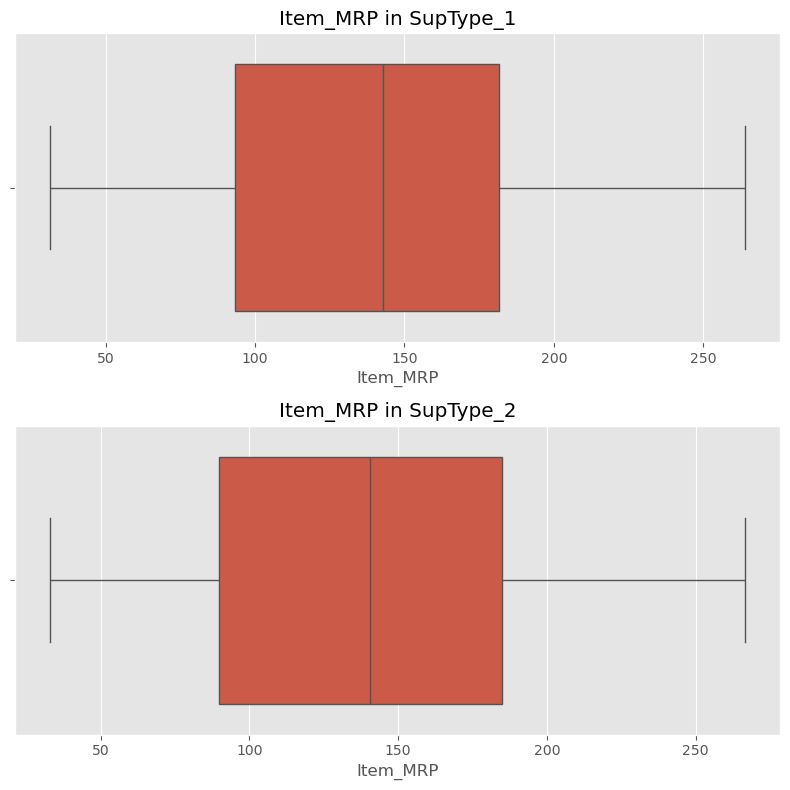

In [33]:
# Oppgave 7
# Choosing plot style 
plt.style.use('ggplot')

# Creating a subplot and boxplot for SubType_1
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(x='Item_MRP', data=SupType_1)
plt.title('Item_MRP in SupType_1')

# Creating a subplot and boxplot for SubType_2
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
sns.boxplot(x='Item_MRP', data=SupType_2)
plt.title('Item_MRP in SupType_2')

# Tweaking layout so the boxplots don't display on top of each other
plt.tight_layout()

# Show plots
plt.show()

In [36]:
# The median seems to be very close on both SubTypes, slightly higher on SubType1. To get the numbers we will use median()
print(SupType_1['Item_MRP'].median())
print(SupType_2['Item_MRP'].median())

142.9141
140.5154


In [55]:
# SubType_1 (previously Supermarket Type 3) has a higher median MRP than SubType_2 (previously Grocery Store)
# We identify no outliers in Item_MRP, because all the displayed data falls within the whiskers

# Oppgave 8
# Sort concat df  in ascending order based on Item_Outlet_Sales
Grc_Concat_df = pd.concat([SupType_1, SupType_2])
Grc_Concat_df.sort_values(by='Item_Outlet_Sales')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,9.50,low fat,0.000000,Soft Drinks,32.8900,1998,NaN,Tier 3,Grocery Store,33.2900
2571,NaN,regular,0.134328,Snack Foods,35.0558,1985,Small,Tier 1,Grocery Store,33.9558
3053,NaN,low fat,0.073077,Health and Hygiene,34.3216,1985,Small,Tier 1,Grocery Store,34.6216
4265,15.35,low fat,0.023466,Frozen Foods,35.2190,1998,NaN,Tier 3,Grocery Store,36.6190
2055,NaN,regular,0.000000,Baking Goods,38.1848,1985,Small,Tier 1,Grocery Store,37.2848
...,...,...,...,...,...,...,...,...,...,...
2109,NaN,low fat,0.035737,Fruits and Vegetables,260.6278,1985,Medium,Tier 3,Supermarket Type3,9371.8008
3098,NaN,regular,0.087221,Dairy,263.9910,1985,Medium,Tier 3,Supermarket Type3,9467.6760
1009,NaN,low fat,0.034584,Dairy,248.3750,1985,Medium,Tier 3,Supermarket Type3,10236.6750
4349,NaN,low fat,0.088840,Snack Foods,254.2672,1985,Medium,Tier 3,Supermarket Type3,10993.6896


In [57]:
# Based on the info above, we see that the Outlet_Location_Type for the store with the lowest sales is Tier 3. 

# Oppgave 9 
# Creating multiple index Grc_Concat with the desired columns
Grc_Concat_df.set_index(['Outlet_Size', 'Outlet_Location_Type'])




Item_Weight Item_Fat_Content  \
Outlet_Size Outlet_Location_Type                                 
Medium      Tier 3                        NaN          low fat   
            Tier 3                        NaN          low fat   
            Tier 3                        NaN          regular   
            Tier 3                        NaN          regular   
            Tier 3                        NaN          regular   
...                                       ...              ...   
Small       Tier 1                        NaN          low fat   
NaN         Tier 3                      16.20          low fat   
Small       Tier 1                        NaN          low fat   
            Tier 1                        NaN          low fat   
NaN         Tier 3                      11.65          low fat   

                                  Item_Visibility              Item_Type  \
Outlet_Size Outlet_Location_Type                                           
Medium      Tier 3                       0.127470            Snack Foods   
            Tier 3                       0.034238            Hard Drinks   
            Tier 3                       0.035400           Baking Goods   
            Tier 3                       0.059512  Fruits and Vegetables   
            Tier 3                       0.123111            Snack Foods   
...                                           ...                    ...   
Small       Tier 1                       0.126761              Breakfast   
NaN         Tier 3                       0.074019           Frozen Foods   
Small       Tier 1                       0.124300              Household   
            Tier 1                       0.122832                  Dairy   
NaN         Tier 3                       0.220111           Baking Goods   

                                  Item_MRP  Outlet_Establishment_Year  \
Outlet_Size Outlet_Location_Type                                        
Medium      Tier 3                107.7622                       1985   
            Tier 3                113.2834                       1985   
            Tier 3                144.5444                       1985   
            Tier 3                128.0678                       1985   
            Tier 3                 36.9874                       1985   
...                                    ...                        ...   
Small       Tier 1                176.9370                       1985   
NaN         Tier 3                 41.7454                       1998   
Small       Tier 1                 73.4696                       1985   
            Tier 1                217.6850                       1985   
NaN         Tier 3                153.0024                       1998   

                                        Outlet_Type  Item_Outlet_Sales  
Outlet_Size Outlet_Location_Type                                        
Medium      Tier 3                Supermarket Type3          4022.7636  
            Tier 3                Supermarket Type3          2303.6680  
            Tier 3                Supermarket Type3          4064.0432  
            Tier 3                Supermarket Type3          2797.6916  
            Tier 3                Supermarket Type3           388.1614  
...                                             ...                ...  
Small       Tier 1                    Grocery Store           352.8740  
NaN         Tier 3                    Grocery Store            83.8908  
Small       Tier 1                    Grocery Store           298.2784  
            Tier 1                    Grocery Store           432.7700  
NaN         Tier 3                    Grocery Store           455.4072  

[1146 rows x 8 columns]

In [64]:
#Oppgave 10 
# Creating 10 buckets as requested
Grc_Concat_df['Item_Weight_Buckets'] = pd.qcut(Grc_Concat_df['Item_Weight'], q=10, labels=False)

# Compute and print each bucket's mean, minimum, maximum, and count directly
print(Grc_Concat_df.groupby('Item_Weight_Buckets')['Item_Weight'].agg(['mean', 'min', 'max', 'count']))


                          mean     min     max  count
Item_Weight_Buckets                                  
0.0                   5.837273   4.610   6.610     33
1.0                   7.250000   6.615   7.810     33
2.0                   8.823333   7.825   9.500     36
3.0                  10.439310   9.600  11.395     29
4.0                  12.177273  11.500  12.850     33
5.0                  14.311429  13.000  15.200     35
6.0                  15.821667  15.250  16.500     30
7.0                  17.398571  16.600  18.200     35
8.0                  19.157576  18.250  20.000     33
9.0                  20.603226  20.100  21.350     31
